Forecasting is an important approach to plan the future effectively and efficiently. A leading retailer in USA, wants to forecast sales for their product categories in their store based on the sales history of each category. Sales forecast has very high influence on the performance of the company’s business and hence these sales forecasts can be used to estimate company’s success or performance in the coming year. Accurate forecasts may lead to better decisions in business. Sales or revenues forecasting is very important for retail operations. Forecasting of retail sales helps retailer to take necessary measures to plan their budgets or investments in a period (monthly, yearly) among different product categories like women clothing, men clothing and other clothing and at the same time they can plan to minimize revenue loss from unavailability of products by investing accordingly.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

There are 4 datasets :
    
1. Train Data (Sales and the Year/Month)
2. Weather Data Set
3. Events and Holidays Dataset
4. Macro Economic Dataset


We will explore each dataset one by one.

##### 1. Train Data (Sales and the Year/Month)

In [157]:
train=pd.read_csv('train.csv')

In [158]:
train.shape

(180, 4)

In [159]:
train.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [160]:
train.nunique()

Year                           5
Month                         12
ProductCategory                3
Sales(In ThousandDollars)    162
dtype: int64

In [161]:
for i in train.drop('Sales(In ThousandDollars)',axis=1).columns:
    print(i,train[i].unique())

Year [2009 2010 2011 2012 2013]
Month [ 1  2  3  4  5  6  7  8  9 10 11 12]
ProductCategory ['WomenClothing' 'MenClothing' 'OtherClothing']


In [162]:
train.groupby(['Year','Month','ProductCategory']).mean().iloc[0:36,:]

Sales(In ThousandDollars)
Year Month ProductCategory                           
2009 1     MenClothing                          524.0
           OtherClothing                        936.0
           WomenClothing                       1755.0
     2     MenClothing                          496.0
           OtherClothing                        859.0
           WomenClothing                       1729.0
     3     MenClothing                          542.0
           OtherClothing                        921.0
           WomenClothing                       2256.0
     4     MenClothing                          669.0
           OtherClothing                        914.0
           WomenClothing                       2662.0
     5     MenClothing                          650.0
           OtherClothing                        989.0
           WomenClothing                       2732.0
     6     MenClothing                          607.0
           OtherClothing                        932.0
           WomenClothing                       2220.0
     7     MenClothing                          575.0
           OtherClothing                        901.0
           WomenClothing                       2164.0
     8     MenClothing                          551.0
           OtherClothing                        865.0
           WomenClothing                       2371.0
     9     MenClothing                          579.0
           OtherClothing                        819.0
           WomenClothing                       2421.0
     10    MenClothing                          610.0
           OtherClothing                        914.0
           WomenClothing                       2579.0
     11    MenClothing                          620.0
           OtherClothing                        955.0
           WomenClothing                       2521.0
     12    MenClothing                          930.0
           OtherClothing                       1351.0
           WomenClothing                       3390.0

* The data is of years from 2009 to 2013 for each month (January to December) with different catogeries namely Women Clothing, Men Clothing, Other Clothing.  
* It gives every years monthly average sales for each category.

In [163]:
# Checking for null values
train.isnull().sum()

Year                          0
Month                         0
ProductCategory               0
Sales(In ThousandDollars)    10
dtype: int64

In [164]:
# There are null values in Sales 
train[train['Sales(In ThousandDollars)'].isnull()]

,Year,Month,ProductCategory,Sales(In ThousandDollars)
45,2010,4,WomenClothing,NaN
47,2010,4,OtherClothing,NaN
58,2010,8,MenClothing,NaN
88,2011,6,MenClothing,NaN
89,2011,6,OtherClothing,NaN
99,2011,10,WomenClothing,NaN
113,2012,2,OtherClothing,NaN
130,2012,8,MenClothing,NaN
132,2012,9,WomenClothing,NaN
173,2013,10,OtherClothing,NaN


As we can see that there are 10 null values in sales, assuming that sales will be similar in each month for same category we fill the null values with the mean of each category. 


In [165]:
train['Sales(In ThousandDollars)']=train.groupby(['Month','ProductCategory'])['Sales(In ThousandDollars)'].transform(lambda x: x.fillna(x.mean()))

### Visualizing the data 

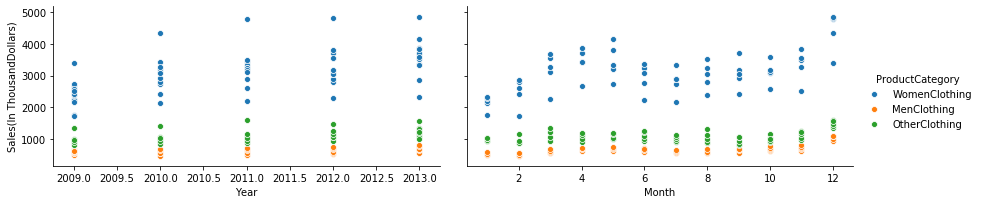

In [168]:
sns.pairplot(x_vars=['Year','Month'],y_vars='Sales(In ThousandDollars)',hue='ProductCategory',data=train,height=3,aspect=2)
plt.show()

From the above plot it is clear that in every year and every month the maximum sales in done in the Womens clothing category and the least in Men's clothing.

In [252]:
# Converting the data into numerical
train=pd.get_dummies(train,drop_first=True)

### 2. Weather Data Set

In [87]:
weather=pd.read_excel('WeatherData.xlsx')
weather.head()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,-3,-6,-9,-16,-17,-19,54,...,1023,1015,16,16,16,37,18,60,0,NaN
1,2009,Jan,2,1,-2,-5,-3,-7,-17,78,...,1012,1007,16,13,2,27,10,48,T,Snow
2,2009,Jan,3,3,1,-2,-5,-9,-13,72,...,1015,1008,16,16,16,27,16,42,T,NaN
3,2009,Jan,4,6,1,-4,-10,-12,-13,55,...,1017,1015,16,16,16,32,12,40,0,NaN
4,2009,Jan,5,6,5,3,-1,-5,-16,62,...,1014,1013,16,16,16,23,11,34,T,NaN


In [88]:
weather.shape

(365, 23)

In [89]:
print('Year: ',weather.Year.unique())
print('Month: ',weather.Month.unique())
print('Day: ',weather.Day.unique())

Year:  [2009]
Month:  ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Day:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


The data contains the information of weather of a single year 2009 where temperature, humidity, wind etc. is recorded for each day.  

In [90]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 23 columns):
Year                           365 non-null int64
Month                          365 non-null object
Day                            365 non-null int64
Temp high (°C)                 365 non-null int64
Temp avg (°C)                  365 non-null int64
Temp low (°C)                  365 non-null int64
Dew Point high (°C)            365 non-null int64
Dew Point avg (°C)             365 non-null int64
Dew Point low (°C)             365 non-null int64
Humidity (%) high              365 non-null int64
Humidity (%) avg               365 non-null int64
Humidity (%) low               365 non-null int64
Sea Level Press. (hPa) high    365 non-null int64
Sea Level Press. (hPa) avg     365 non-null int64
Sea Level Press. (hPa) low     365 non-null int64
Visibility (km) high           365 non-null int64
Visibility (km) avg            365 non-null int64
Visibility (km) low            365 non-null 

In [91]:
new_col=['Year', 'Month', 'Day', 'Temp high (°C)', 'Temp avg (°C)',
       'Temp low (°C)', 'Dew Point high (°C)', 'Dew Point avg (°C)',
       'Dew Point low (°C)', 'Humidity (%) high', 'Humidity (%) avg',
       'Humidity (%) low', 'Sea Level Press. (hPa) high',
       'Sea Level Press. (hPa) avg', 'Sea Level Press. (hPa) low',
       'Visibility (km) high', 'Visibility (km) avg', 'Visibility (km) low',
       'Wind (km/h) low', 'Wind (km/h) avg', 'Wind (km/h) high',
       'Precipitation', 'WeatherEvent']
weather.columns=new_col

In [92]:
# The wind and precipitation columns are numeric but considered as catogorical so we change it to numerical.

weather['Wind (km/h) low']=pd.to_numeric(weather['Wind (km/h) low'], errors='coerce')  
weather['Wind (km/h) avg']=pd.to_numeric(weather['Wind (km/h) avg'], errors='coerce')
weather['Wind (km/h) high']=pd.to_numeric(weather['Wind (km/h) high'], errors='coerce')

weather['Precipitation']=pd.to_numeric(weather['Precipitation'], errors='coerce')
# coerce will convert non numeric values to null

In [94]:
weather.isnull().sum()

Year                             0
Month                            0
Day                              0
Temp high (°C)                   0
Temp avg (°C)                    0
Temp low (°C)                    0
Dew Point high (°C)              0
Dew Point avg (°C)               0
Dew Point low (°C)               0
Humidity (%) high                0
Humidity (%) avg                 0
Humidity (%) low                 0
Sea Level Press. (hPa) high      0
Sea Level Press. (hPa) avg       0
Sea Level Press. (hPa) low       0
Visibility (km) high             0
Visibility (km) avg              0
Visibility (km) low              0
Wind (km/h) low                  3
Wind (km/h) avg                  3
Wind (km/h) high                 4
Precipitation                   26
WeatherEvent                   225
dtype: int64

In [95]:
# Filling null values of wind and precipitation columns with their mean values
weather['Wind (km/h) low']=weather['Wind (km/h) low'].fillna(weather['Wind (km/h) low'].mean())
weather['Wind (km/h) avg']=weather['Wind (km/h) avg'].fillna(weather['Wind (km/h) avg'].mean())
weather['Wind (km/h) high']=weather['Wind (km/h) high'].fillna(weather['Wind (km/h) high'].mean())

weather['Precipitation']=weather['Precipitation'].fillna(weather['Precipitation'].mean())


In [96]:
weather.isnull().sum()*100/weather.shape[0]

Year                            0.000000
Month                           0.000000
Day                             0.000000
Temp high (°C)                  0.000000
Temp avg (°C)                   0.000000
Temp low (°C)                   0.000000
Dew Point high (°C)             0.000000
Dew Point avg (°C)              0.000000
Dew Point low (°C)              0.000000
Humidity (%) high               0.000000
Humidity (%) avg                0.000000
Humidity (%) low                0.000000
Sea Level Press. (hPa) high     0.000000
Sea Level Press. (hPa) avg      0.000000
Sea Level Press. (hPa) low      0.000000
Visibility (km) high            0.000000
Visibility (km) avg             0.000000
Visibility (km) low             0.000000
Wind (km/h) low                 0.000000
Wind (km/h) avg                 0.000000
Wind (km/h) high                0.000000
Precipitation                   0.000000
WeatherEvent                   61.643836
dtype: float64

In [97]:
# Since weather event have 61.64% of null values, we will remove that column
weather=weather.drop('WeatherEvent',axis=1)

In [98]:
weather.head()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precipitation
0,2009,Jan,1,-3,-6,-9,-16,-17,-19,54,...,1025,1023,1015,16,16,16,37.0,18.0,60.0,0.000000
1,2009,Jan,2,1,-2,-5,-3,-7,-17,78,...,1022,1012,1007,16,13,2,27.0,10.0,48.0,4.013746
2,2009,Jan,3,3,1,-2,-5,-9,-13,72,...,1018,1015,1008,16,16,16,27.0,16.0,42.0,4.013746
3,2009,Jan,4,6,1,-4,-10,-12,-13,55,...,1020,1017,1015,16,16,16,32.0,12.0,40.0,0.000000
4,2009,Jan,5,6,5,3,-1,-5,-16,62,...,1016,1014,1013,16,16,16,23.0,11.0,34.0,4.013746


In [99]:
# Month can be represented with numbers like Jan by 1 and so on..
weather.Month=weather.Month.replace({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12})

In [100]:
weather.columns

Index(['Year', 'Month', 'Day', 'Temp high (°C)', 'Temp avg (°C)',
       'Temp low (°C)', 'Dew Point high (°C)', 'Dew Point avg (°C)',
       'Dew Point low (°C)', 'Humidity (%) high', 'Humidity (%) avg',
       'Humidity (%) low', 'Sea Level Press. (hPa) high',
       'Sea Level Press. (hPa) avg', 'Sea Level Press. (hPa) low',
       'Visibility (km) high', 'Visibility (km) avg', 'Visibility (km) low',
       'Wind (km/h) low', 'Wind (km/h) avg', 'Wind (km/h) high',
       'Precipitation'],
      dtype='object')

We take the average of high, average and low of each column and form a new feature. We also drop the high, average and low of each feature.

In [101]:
# Temperature
weather['Temp']=(weather['Temp high (°C)']+weather['Temp avg (°C)']+weather['Temp low (°C)'])/3
weather=weather.drop(['Temp high (°C)','Temp avg (°C)','Temp low (°C)'],axis=1)

In [102]:
# Dew
weather['Dew']=(weather['Dew Point high (°C)']+weather['Dew Point avg (°C)']+weather['Dew Point low (°C)'])/3
weather=weather.drop(['Dew Point high (°C)','Dew Point avg (°C)','Dew Point low (°C)'],axis=1)

In [103]:
# Humidity
weather['Humidity']=(weather['Humidity (%) high']+weather['Humidity (%) avg']+weather['Humidity (%) low'])/3
weather=weather.drop(['Humidity (%) high','Humidity (%) avg','Humidity (%) low'],axis=1)

In [104]:
# Sea Level
weather['Sea Level']=(weather['Sea Level Press. (hPa) high']+weather['Sea Level Press. (hPa) avg']+weather['Sea Level Press. (hPa) low'])/3
weather=weather.drop(['Sea Level Press. (hPa) high','Sea Level Press. (hPa) avg','Sea Level Press. (hPa) low'],axis=1)

In [105]:
# Visibility
weather['Visibility']=(weather['Visibility (km) high']+weather['Visibility (km) avg']+weather['Visibility (km) low'])/3
weather=weather.drop(['Visibility (km) high','Visibility (km) avg','Visibility (km) low'],axis=1)

In [106]:
# Wind
weather['Wind']=(weather['Wind (km/h) high']+weather['Wind (km/h) avg']+weather['Wind (km/h) low'])/3
weather=weather.drop(['Wind (km/h) high','Wind (km/h) avg','Wind (km/h) low'],axis=1)


In [107]:
weather.head()

,Year,Month,Day,Precipitation,Temp,Dew,Humidity,Sea Level,Visibility,Wind
0,2009,1,1,0.000000,-6.000000,-17.333333,43.000000,1021.000000,16.000000,38.333333
1,2009,1,2,4.013746,-2.000000,-9.000000,57.000000,1013.666667,10.333333,28.333333
2,2009,1,3,4.013746,0.666667,-9.000000,53.666667,1013.666667,16.000000,28.333333
3,2009,1,4,0.000000,1.000000,-11.666667,42.000000,1017.333333,16.000000,28.000000
4,2009,1,5,4.013746,4.666667,-7.333333,47.666667,1014.333333,16.000000,22.666667


In [108]:
weather.describe()

,Year,Month,Day,Precipitation,Temp,Dew,Humidity,Sea Level,Visibility,Wind
count,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2009.0,6.526027,15.720548,4.013746,12.328767,5.193607,65.077626,1016.495890,13.463927,23.449108
std,0.0,3.452584,8.808321,8.511616,9.113799,10.451978,14.844855,7.423628,3.130601,6.843252
min,2009.0,1.000000,1.000000,0.000000,-11.000000,-19.333333,23.000000,994.666667,6.333333,9.000000
25%,2009.0,4.000000,8.000000,0.000000,6.000000,-2.666667,54.000000,1012.333333,10.666667,18.333333
50%,2009.0,7.000000,16.000000,0.000000,12.666667,6.333333,65.666667,1016.666667,15.333333,22.666667
75%,2009.0,10.000000,23.000000,4.013746,20.666667,14.000000,75.666667,1021.666667,16.000000,27.333333
max,2009.0,12.000000,31.000000,58.420000,28.666667,23.000000,96.666667,1032.333333,16.000000,49.000000


We will check the skewness of the data to see if the data is normally distributed or not. Skewness refers to distortion or asymmetry in a symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution.If skewness is between −0.5 and +0.5 the distribution is considered approximately symmetric.

In [109]:
# Checking for the columns whose skewness lies outside -0.5 and +0.5.
weather.skew()[abs(weather.skew())>0.5]

Precipitation    3.148326
Visibility      -0.761885
Wind             0.771447
dtype: float64

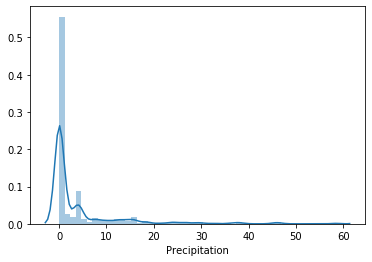

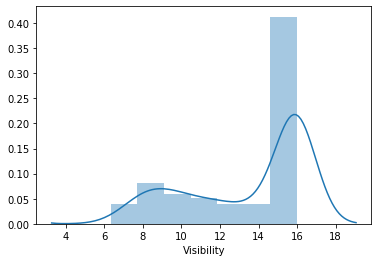

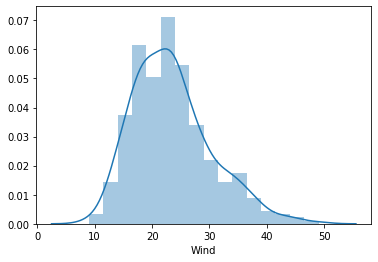

In [110]:
# Distribution of highly skewed features.
for i in ['Precipitation', 'Visibility','Wind']:
    sns.distplot(weather[i])
    plt.show()

To remove/reduce the skewness we can do suitable transformations. Here we will be using boxcox transformation.

In [111]:
# To use boxcox the data must be positive, so we check if the minimum values is less than 0 or not
for i in ['Precipitation', 'Visibility','Wind']:
    if weather[i].min()<=0:
        print(i)
    

Precipitation


In [112]:
# Since 'Precipitation' have negative value we make the minimum value to 1
weather['Precipitation']=(weather['Precipitation']-weather['Precipitation'].min()+1)

In [113]:
# Now we apply boxcox to the skewed columns
from scipy import stats 
from scipy.stats import boxcox
lambdas={}
for i in ['Precipitation', 'Visibility','Wind']:
    weather[i],lambdas[i]=stats.boxcox(weather[i])
    

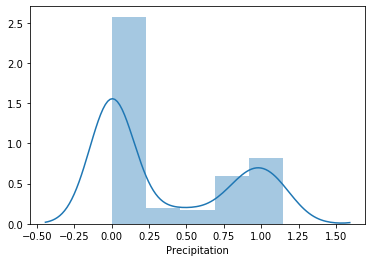

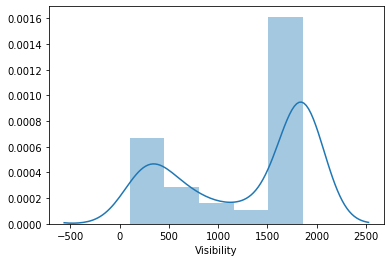

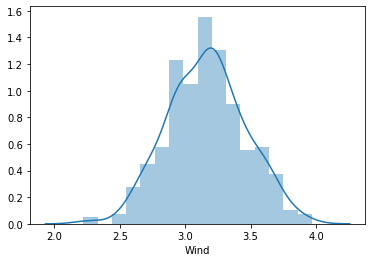

In [114]:
# Checking the distribution after transformation
for i in ['Precipitation', 'Visibility','Wind']:
    sns.distplot(weather[i])
    plt.show()

In [115]:
weather.skew()[abs(weather.skew())>0.5]
# The skewnwss have reduced and almost in range [-0.5,0.5]

Precipitation    0.603222
Visibility      -0.511404
dtype: float64

In [183]:
corr=weather.drop("Year",axis=1).corr()

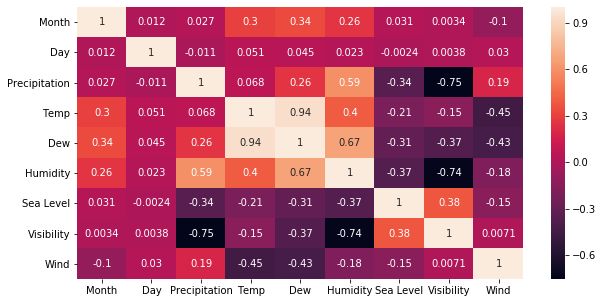

In [184]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)
bottom,top=plt.ylim()
plt.ylim(bottom+0.5,top-0.5)
plt.show()

In any year the weather of a month remains similar. Hence we can take the average over month.  

In [124]:
weather_avg=weather.groupby(['Year','Month']).mean()
weather_avg.reset_index(inplace=True)
weather_avg

,Year,Month,Day,Precipitation,Temp,Dew,Humidity,Sea Level,Visibility,Wind
0,2009,1,16.0,0.343857,-2.225806,-10.000000,57.150538,1015.924731,1361.311773,3.286670
1,2009,2,14.5,0.222729,2.702381,-6.476190,53.880952,1017.083333,1562.593949,3.322156
2,2009,3,16.0,0.258258,5.860215,-3.129032,56.903226,1021.064516,1288.250194,3.268979
3,2009,4,15.5,0.378411,12.555556,2.522222,55.633333,1014.600000,1293.350474,3.290654
4,2009,5,16.0,0.440221,16.946237,9.860215,68.365591,1017.236559,1074.815911,3.056298
5,2009,6,15.5,0.666024,19.788889,15.200000,78.566667,1011.066667,789.441812,3.010512
6,2009,7,16.0,0.370066,22.602151,16.301075,70.634409,1013.559140,1055.429441,3.051247
7,2009,8,16.0,0.364624,24.301075,18.354839,72.344086,1015.860215,1218.889712,2.903351
8,2009,9,15.5,0.198724,19.111111,12.655556,69.488889,1018.511111,1577.060962,3.069744
9,2009,10,16.0,0.390493,12.827957,6.924731,69.225806,1016.731183,1318.055465,3.120891


In [125]:
# Since weather will be similar every year, there is no importance of year and day here. 
weather_avg=weather_avg.drop(['Year','Day'],axis=1)

In [126]:
weather_avg.describe()

,Month,Precipitation,Temp,Dew,Humidity,Sea Level,Visibility,Wind
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,0.362822,12.285652,5.136602,65.013705,1016.493026,1268.676841,3.164089
std,3.605551,0.122583,8.647378,9.633815,7.814038,2.613186,218.604585,0.147720
min,1.000000,0.198724,-2.225806,-10.000000,53.880952,1011.066667,789.441812,2.903351
25%,3.750000,0.286000,5.070757,-3.540323,57.088710,1015.545161,1182.871262,3.055035
50%,6.500000,0.367345,12.691756,5.562366,67.399462,1016.907258,1290.800334,3.168197
75%,9.250000,0.399173,19.280556,13.291667,69.775269,1017.603584,1370.381417,3.287666
max,12.000000,0.666024,24.301075,18.354839,78.566667,1021.064516,1577.060962,3.373058


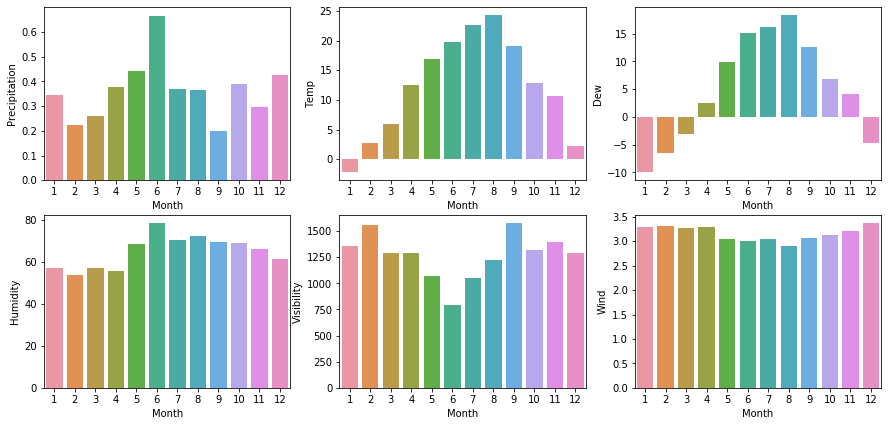

In [154]:
# The graphs shows variation of 'Precipitation','Temp','Dew','Humidity','Visibility' and 'Wind' over different months.
fig, ax=plt.subplots(2,3,figsize=(15,7))
ax=ax.flatten()
j=0
for i in ['Precipitation','Temp','Dew','Humidity','Visibility','Wind']:
    sns.barplot(x='Month',y=i,data=weather_avg,ax=ax[j])
    j=j+1
plt.show()


### 3. Events and Holidays Dataset

In [169]:
holiday=pd.read_excel('Events_HolidaysData.xlsx')
holiday.shape

(150, 4)

In [170]:
holiday.head()

,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event


In [171]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
Year           150 non-null int64
MonthDate      150 non-null datetime64[ns]
Event          150 non-null object
DayCategory    150 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.8+ KB


In [172]:
holiday.nunique()

Year            8
MonthDate      71
Event          23
DayCategory     2
dtype: int64

In [176]:
holiday.Year.value_counts()
# The data consists of informations from year 2010-2016

2016    20
2015    20
2010    20
2012    19
2014    18
2011    18
2009    18
2013    17
Name: Year, dtype: int64

In [177]:
# Extracting month, day and year into new columns
holiday['ExactYear']=pd.DatetimeIndex(holiday['MonthDate']).year
holiday['Month']=pd.DatetimeIndex(holiday['MonthDate']).month
holiday['Day']=pd.DatetimeIndex(holiday['MonthDate']).day


In [180]:
holiday['Event'].value_counts()

New Year's Day                 8
Columbus Day (Most regions)    8
Martin Luther King Jr. Day     8
Easter Sunday                  8
Veterans Day                   8
Valentine's Day                8
Mother's Day                   8
Christmas Day                  8
Thanksgiving Day               8
Memorial Day                   8
Christmas Eve                  8
Presidents' Day                8
Labor Day                      8
Independence Day               8
Halloween                      8
New Year's Eve                 8
Father's Day                   8
'Independence Day' observed    3
'Christmas Day' observed       3
Thomas Jefferson's Birthday    3
Election Day                   2
'New Year's Day' observed      2
Day After Christmas Day        1
Name: Event, dtype: int64

In [181]:
# 'New Year's Day' observed and 'New Year's Day' is same so we the change.
holiday['Event']=holiday['Event'].replace({"'Christmas Day' observed":"Christmas Day","Day After Christmas Day":"Christmas Day","'Independence Day' observed":"Independence Day","'New Year's Day' observed":"New Year's Day"})

Lets analyse events of each month and compare it with the MonthDate. 

#### 1. January

In [185]:
holiday[(holiday['Month']==1)]

,Year,MonthDate,Event,DayCategory,ExactYear,Month,Day
0,2009,2001-01-01,New Year's Day,Federal Holiday,2001,1,1
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday,2019,1,1
18,2010,2001-01-01,New Year's Day,Federal Holiday,2001,1,1
19,2010,2018-01-01,Martin Luther King Jr. Day,Federal Holiday,2018,1,1
38,2011,2001-01-01,New Year's Day,Federal Holiday,2001,1,1
39,2011,2017-01-01,Martin Luther King Jr. Day,Federal Holiday,2017,1,1
56,2012,2001-01-01,New Year's Day,Federal Holiday,2001,1,1
57,2012,2002-01-01,New Year's Day,Federal Holiday,2002,1,1
58,2012,2016-01-01,Martin Luther King Jr. Day,Federal Holiday,2016,1,1
75,2013,2001-01-01,New Year's Day,Federal Holiday,2001,1,1


It seems that Martin luther King Jr. Day is same as New year's day after 2016. Hence we replace Martin Luther King Jr. Day with New Year's Day as we are now dealing with years 2009-2014

In [186]:
holiday.loc[(holiday['Month']==1),'Event']=holiday.loc[(holiday['Month']==1),'Event'].replace({"Martin Luther King Jr. Day":"New Year's Day"})

#### 2. February

In [187]:
holiday[(holiday['Month']==2)]

,Year,MonthDate,Event,DayCategory,ExactYear,Month,Day
2,2009,2014-02-01,Valentine's Day,Event,2014,2,1
3,2009,2016-02-01,Presidents' Day,Federal Holiday,2016,2,1
20,2010,2014-02-01,Valentine's Day,Event,2014,2,1
21,2010,2015-02-01,Presidents' Day,Federal Holiday,2015,2,1
40,2011,2014-02-01,Valentine's Day,Event,2014,2,1
41,2011,2021-02-01,Presidents' Day,Federal Holiday,2021,2,1
59,2012,2014-02-01,Valentine's Day,Event,2014,2,1
60,2012,2020-02-01,Presidents' Day,Federal Holiday,2020,2,1
77,2013,2014-02-01,Valentine's Day,Event,2014,2,1
78,2013,2018-02-01,Presidents' Day,Federal Holiday,2018,2,1


Since we are concerned only with year 2009-2014 and here it is clear that Valentine's Day coincides with Federal Holiday after only 2014 we will change it to Valentine's day  and day category to Event.

In [188]:
holiday.loc[(holiday['Month']==2),'Event']=holiday.loc[(holiday['Month']==2),'Event'].replace({"Presidents' Day":"Valentine's Day"})
holiday.loc[(holiday['Month']==2),'DayCategory']=holiday.loc[(holiday['Month']==2) ,'DayCategory'].replace({"Federal Holiday":"Event"})

#### 3. March

In [189]:
holiday[(holiday['Month']==3)]

,Year,MonthDate,Event,DayCategory,ExactYear,Month,Day
79,2013,1931-03-01,Easter Sunday,Event,1931,3,1
134,2016,2027-03-01,Easter Sunday,Event,2027,3,1


Easter can be march or april, from the data it occures only in march in the year 1931 and 2027, so we are going to drop these.

In [190]:
holiday=holiday.drop([79,134])

#### 4. April

In [191]:
holiday[(holiday['Month']==4)]

,Year,MonthDate,Event,DayCategory,ExactYear,Month,Day
4,2009,2012-04-01,Easter Sunday,Event,2012,4,1
22,2010,2004-04-01,Easter Sunday,Event,2004,4,1
42,2011,2024-04-01,Easter Sunday,Event,2024,4,1
61,2012,2008-04-01,Easter Sunday,Event,2008,4,1
96,2014,2013-04-01,Thomas Jefferson's Birthday,Event,2013,4,1
97,2014,2020-04-01,Easter Sunday,Event,2020,4,1
114,2015,2005-04-01,Easter Sunday,Event,2005,4,1
115,2015,2013-04-01,Thomas Jefferson's Birthday,Event,2013,4,1
135,2016,2013-04-01,Thomas Jefferson's Birthday,Event,2013,4,1


In only 2013 Thomas Jefferson's Birthday and Easter Sunday coincide so we can replace Thomas Jefferson's Birthday by Easter Sunday in the rest of the years except 2013.

In [194]:
holiday[(holiday['Year']==2013)]
# In 2013 month 4 there is no record, so we create one and add Thomas Jefferson's Birthday 

,Year,MonthDate,Event,DayCategory,ExactYear,Month,Day
75,2013,2001-01-01,New Year's Day,Federal Holiday,2001,1,1
76,2013,2021-01-01,New Year's Day,Federal Holiday,2021,1,1
77,2013,2014-02-01,Valentine's Day,Event,2014,2,1
78,2013,2018-02-01,Valentine's Day,Event,2018,2,1
80,2013,2012-05-01,Mother's Day,Event,2012,5,1
81,2013,2027-05-01,Memorial Day,Federal Holiday,2027,5,1
82,2013,2016-06-01,Father's Day,Event,2016,6,1
83,2013,2004-07-01,Independence Day,Federal Holiday,2004,7,1
84,2013,2002-09-01,Labor Day,Federal Holiday,2002,9,1
85,2013,2014-10-01,Columbus Day (Most regions),Federal Holiday,2014,10,1


In [196]:
holiday.loc[(holiday['Month']==4),'Event']=holiday.loc[(holiday['Month']==4),'Event'].replace({"Thomas Jefferson's Birthday":"Easter Sunday"})

In [197]:
holiday=holiday.append({'Year':2013, 'Event':"Thomas Jefferson's",'DayCategory':'Event','ExactYear':2013,'Month':4,'Day':1}, ignore_index=True)

#### 5. May

In [198]:
holiday[(holiday['Month']==5) ]

,Year,MonthDate,Event,DayCategory,ExactYear,Month,Day
5,2009,2010-05-01,Mother's Day,Event,2010,5,1
6,2009,2025-05-01,Memorial Day,Federal Holiday,2025,5,1
23,2010,2009-05-01,Mother's Day,Event,2009,5,1
24,2010,1931-05-01,Memorial Day,Federal Holiday,1931,5,1
43,2011,2008-05-01,Mother's Day,Event,2008,5,1
44,2011,1930-05-01,Memorial Day,Federal Holiday,1930,5,1
62,2012,2013-05-01,Mother's Day,Event,2013,5,1
63,2012,2028-05-01,Memorial Day,Federal Holiday,2028,5,1
79,2013,2012-05-01,Mother's Day,Event,2012,5,1
80,2013,2027-05-01,Memorial Day,Federal Holiday,2027,5,1


Memorial day comes after 100 years so for now we can replace Memorial Day to Mother's day and Day Catergory to event.


In [199]:
holiday.loc[(holiday['Month']==5),'DayCategory']=holiday.loc[(holiday['Month']==5) ,'DayCategory'].replace({"Federal Holiday":"Event"})
holiday.loc[(holiday['Month']==5),'Event' ]=holiday.loc[(holiday['Month']==5),'Event' ].replace({"Memorial Day":"Mother's Day"})

In months June, July, August and  September the event remains consistent so we do not have to make any changes.

#### 10. October

In [201]:
holiday[(holiday['Month']==10)]

,Year,MonthDate,Event,DayCategory,ExactYear,Month,Day
11,2009,2012-10-01,Columbus Day (Most regions),Federal Holiday,2012,10,1
12,2009,1931-10-01,Halloween,Event,1931,10,1
29,2010,2011-10-01,Columbus Day (Most regions),Federal Holiday,2011,10,1
30,2010,1931-10-01,Halloween,Event,1931,10,1
48,2011,2010-10-01,Columbus Day (Most regions),Federal Holiday,2010,10,1
49,2011,1931-10-01,Halloween,Event,1931,10,1
67,2012,2008-10-01,Columbus Day (Most regions),Federal Holiday,2008,10,1
68,2012,1931-10-01,Halloween,Event,1931,10,1
84,2013,2014-10-01,Columbus Day (Most regions),Federal Holiday,2014,10,1
85,2013,1931-10-01,Halloween,Event,1931,10,1


For the years we are concerned it is Columbus Day (Most regions) and Federal Holiday. It used to be Halloween and Event in 1930's, so we can change Halloween to Columbus day and event to federal holiday.  

In [202]:
holiday.loc[(holiday['Month']==10),'DayCategory']=holiday.loc[(holiday['Month']==10) ,'DayCategory'].replace({"Event":"Federal Holiday"})
holiday.loc[(holiday['Month']==10),'Event' ]=holiday.loc[(holiday['Month']==10),'Event' ].replace({"Halloween":"Columbus Day (Most regions)"})

#### 11. November

In [203]:
holiday[(holiday['Month']==11)]

,Year,MonthDate,Event,DayCategory,ExactYear,Month,Day
13,2009,2011-11-01,Veterans Day,Federal Holiday,2011,11,1
14,2009,2026-11-01,Thanksgiving Day,Federal Holiday,2026,11,1
31,2010,2011-11-01,Veterans Day,Federal Holiday,2011,11,1
32,2010,2025-11-01,Thanksgiving Day,Federal Holiday,2025,11,1
50,2011,2011-11-01,Veterans Day,Federal Holiday,2011,11,1
51,2011,2024-11-01,Thanksgiving Day,Federal Holiday,2024,11,1
69,2012,2006-11-01,Election Day,Event,2006,11,1
70,2012,2011-11-01,Veterans Day,Federal Holiday,2011,11,1
71,2012,2022-11-01,Thanksgiving Day,Federal Holiday,2022,11,1
86,2013,2011-11-01,Veterans Day,Federal Holiday,2011,11,1


In [204]:
holiday.loc[(holiday['Month']==11),'Event' ]=holiday.loc[(holiday['Month']==11),'Event' ].replace({"Election Day":"Thanksgiving Day","Veterans Day":"Thanksgiving Day"})
holiday.loc[(holiday['Month']==11) ,'DayCategory']=holiday.loc[(holiday['Month']==11) ,'DayCategory'].replace({"Event":"Federal Holiday"})

#### 12. December

In [206]:
holiday[(holiday['Month']==12)]

,Year,MonthDate,Event,DayCategory,ExactYear,Month,Day
15,2009,2024-12-01,Christmas Eve,Event,2024,12,1
16,2009,2025-12-01,Christmas Day,Federal Holiday,2025,12,1
17,2009,1931-12-01,New Year's Eve,Event,1931,12,1
33,2010,2024-12-01,Christmas Day,Federal Holiday,2024,12,1
34,2010,2024-12-01,Christmas Eve,Event,2024,12,1
35,2010,2025-12-01,Christmas Day,Federal Holiday,2025,12,1
36,2010,1931-12-01,New Year's Day,Federal Holiday,1931,12,1
37,2010,1931-12-01,New Year's Eve,Event,1931,12,1
52,2011,2024-12-01,Christmas Eve,Event,2024,12,1
53,2011,2025-12-01,Christmas Day,Federal Holiday,2025,12,1


In [207]:
holiday.loc[(holiday['Month']==12),'Event' ]=holiday.loc[(holiday['Month']==12),'Event' ].replace({"Christmas Day":"Christmas_new_year","Christmas Eve":"Christmas_new_year","New Year's Eve":"Christmas_new_year"})
holiday.loc[(holiday['Month']==12) ,'DayCategory']=holiday.loc[(holiday['Month']==12) ,'DayCategory'].replace({"Event":"Federal Holiday"})

Since the day remains the same (1) and the we have already made use of the Exact Year we can remove those columns.

In [208]:
holiday=holiday.drop(['Day','ExactYear','MonthDate'],axis=1)

,Year,MonthDate,Event,DayCategory,Month
0,2009,2001-01-01,New Year's Day,Federal Holiday,1
1,2009,2019-01-01,New Year's Day,Federal Holiday,1
2,2009,2014-02-01,Valentine's Day,Event,2
3,2009,2016-02-01,Valentine's Day,Event,2
4,2009,2012-04-01,Easter Sunday,Event,4
...,...,...,...,...,...
145,2016,2025-12-01,Christmas_new_year,Federal Holiday,12
146,2016,2026-12-01,Christmas_new_year,Federal Holiday,12
147,2016,1931-12-01,Christmas_new_year,Federal Holiday,12
148,2013,NaT,Thomas Jefferson's,Event,4


In [213]:
holiday=holiday.groupby(['Year','Month']).agg(lambda x:x.value_counts().index[0])
holiday.reset_index(inplace=True)
holiday[0:12]

,Year,Month,Event,DayCategory
0,2009,1,New Year's Day,Federal Holiday
1,2009,2,Valentine's Day,Event
2,2009,4,Easter Sunday,Event
3,2009,5,Mother's Day,Event
4,2009,6,Father's Day,Event
5,2009,7,Independence Day,Federal Holiday
6,2009,9,Labor Day,Federal Holiday
7,2009,10,Columbus Day (Most regions),Federal Holiday
8,2009,11,Thanksgiving Day,Federal Holiday
9,2009,12,Christmas_new_year,Federal Holiday


In [214]:
# Since the Event will be the same every year and every month we can remove that as well.
holiday=holiday.drop(['Event'],axis=1)

In [215]:
# Converting into numerical data
holiday=pd.get_dummies(holiday,drop_first=True)

In [216]:
holiday.shape

(80, 3)

### 4. Macro Economic Dataset

In [217]:
macro=pd.read_excel('macro_economic.xlsx')
macro.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009 - May,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,?,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


Real GDP is nominal GDP divided by the deflator, we can combine the information of real and nominal GDP into a new feature by taking their ratio. That is deflator= Nominal GDP/ Real GDP.

In [218]:
macro['GDP_Deflator']=(macro['Monthly Nominal GDP Index (inMillion$)']/macro['Monthly Real GDP Index (inMillion$)'])
macro=macro.drop(['Monthly Nominal GDP Index (inMillion$)','Monthly Real GDP Index (inMillion$)'],axis=1)

The year and month can be extracted from Year-Month column. 

In [219]:
macro['Year']=macro['Year-Month'].str.split('-').str[0].str.strip() # Extracting year
macro['Month']=macro['Year-Month'].str.split('-').str[1].str.strip() # Extracting month
macro['Year']=macro['Year'].astype('int64') # Converting year to integer

In [220]:
# Changing months to numerical representation
macro['Month']=macro.Month.replace({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12})

In [221]:
# Dropping unwanted column
macro=macro.drop('Year-Month',axis=1)

#### Exploring other features

In [222]:
macro['PartyInPower'].value_counts()

Democrats    96
Name: PartyInPower, dtype: int64

In [223]:
# Since all the values in macro['PartyInPower'] is same we remove the column
macro=macro.drop('PartyInPower',axis=1)

In [224]:
macro['AdvertisingExpenses (in Thousand Dollars)']=macro['AdvertisingExpenses (in Thousand Dollars)'].replace({'?':np.nan})

In [225]:
macro.isnull().sum()*100/macro.shape[0]
# Since 88% of AdvertisingExpenses (in Thousand Dollars) is null we will remove that column

CPI                                                                   0.000000
unemployment rate                                                     0.000000
CommercialBankInterestRateonCreditCardPlans                           0.000000
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan     0.000000
Earnings or wages  in dollars per hour                                0.000000
AdvertisingExpenses (in Thousand Dollars)                            88.541667
Cotton Monthly Price - US cents per Pound(lbs)                        0.000000
Change(in%)                                                           0.000000
Average upland planted(million acres)                                 0.000000
Average upland harvested(million acres)                               0.000000
yieldperharvested acre                                                0.000000
Production (in  480-lb netweright in million bales)                   0.000000
Mill use  (in  480-lb netweright in million bales)  

In [226]:
macro=macro.drop('AdvertisingExpenses (in Thousand Dollars)',axis=1)

#### Checking the distribution of the data

In [228]:
# highly skewed columns
macro.skew()[abs(macro.skew())>0.5]

CommercialBankInterestRateonCreditCardPlans           0.928217
Cotton Monthly Price - US cents per Pound(lbs)        2.365885
Average upland planted(million acres)                 0.814538
yieldperharvested acre                                0.650709
Mill use  (in  480-lb netweright in million bales)    0.676828
Exports                                               1.294059
dtype: float64

In [229]:
a=['CommercialBankInterestRateonCreditCardPlans',
   'Cotton Monthly Price - US cents per Pound(lbs)',
   'Average upland planted(million acres)',
   'yieldperharvested acre',
   "Mill use  (in  480-lb netweright in million bales)",
   'Exports']           

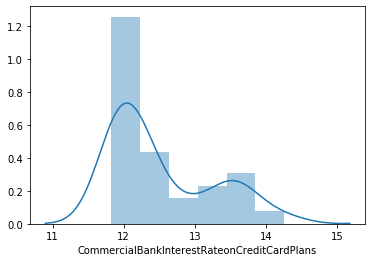

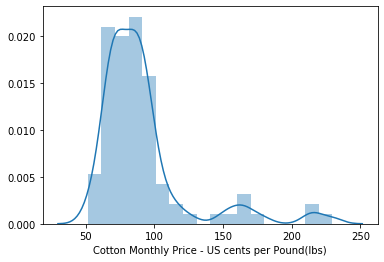

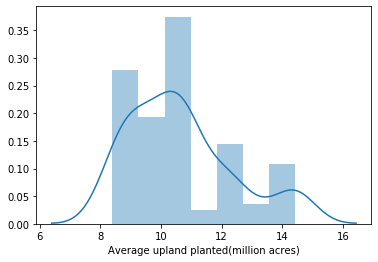

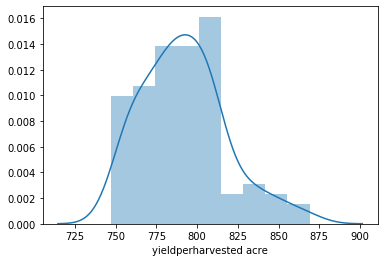

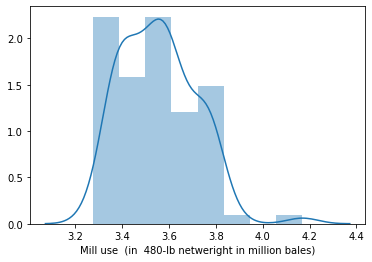

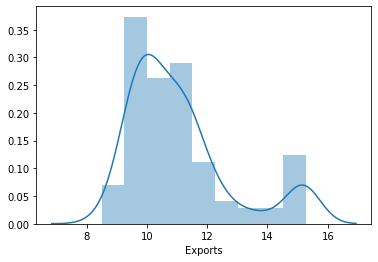

In [230]:
for i in a:
    sns.distplot(macro[i])
    plt.show()

In [231]:
# To use boxcox the data must be positive, so we check if the minimum values is less than 0 or not
for i in a:
    if macro[i].min()<=0:
        print(i)
# There are no columns with negative value

In [232]:
# Now we apply boxcox to the skewed columns
from scipy import stats 
from scipy.stats import boxcox
lambdas_macro={}
for i in a:
    macro[i],lambdas_macro[i]=stats.boxcox(macro[i])
    

In [233]:
# Checking the skewness after boxcox 
macro.skew()[abs(macro.skew())>0.5]
# Now there are no highly skewed columns

Series([], dtype: float64)

### Creating test data

We have to predict the sales year 2014 in each month under each category. So we create a dataframe consisting of 12 months with 3 categories of the year 2014.

In [254]:
test=train.copy()
test=test[test['Year']==2013] 
test['Year']=test['Year'].replace({2013:2014})

In [255]:
test.shape

(36, 5)

### Combining Data for train and test

In [257]:
train_macro=pd.merge(train,macro,how='left',on=['Year','Month'])
test_macro=pd.merge(test,macro,how='left',on=['Year','Month'])

In [258]:
train_macro.shape,test_macro.shape

((180, 19), (36, 19))

In [259]:
train_macro_weather=pd.merge(train_macro,weather_avg,how='left',on=['Month'])
test_macro_weather=pd.merge(test_macro,weather_avg,how='left',on=['Month'])

In [260]:
train_macro_weather.shape,test_macro_weather.shape

((180, 26), (36, 26))

In [261]:
train_macro_weather_holiday=pd.merge(train_macro_weather,holiday,how='left',on=['Year','Month'])
test_macro_weather_holiday=pd.merge(test_macro_weather,holiday,how='left',on=['Year','Month'])

In [262]:
train_macro_weather_holiday.shape,test_macro_weather_holiday.shape

((180, 27), (36, 27))

#### Splitting X and y and creating X_train, X_test, y_train, y_test

In [263]:
X_train=train_macro_weather_holiday.drop('Sales(In ThousandDollars)',axis=1)
y_train=train_macro_weather_holiday['Sales(In ThousandDollars)']

X_test=test_macro_weather_holiday.drop('Sales(In ThousandDollars)',axis=1)
y_test=test_macro_weather_holiday['Sales(In ThousandDollars)']

In [264]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(180, 26) (36, 26) (180,) (36,)


In [265]:
print(X_train.isnull().sum(),X_test.isnull().sum())

Year                                                                  0
Month                                                                 0
ProductCategory_OtherClothing                                         0
ProductCategory_WomenClothing                                         0
CPI                                                                   0
unemployment rate                                                     0
CommercialBankInterestRateonCreditCardPlans                           0
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan     0
Earnings or wages  in dollars per hour                                0
Cotton Monthly Price - US cents per Pound(lbs)                        0
Change(in%)                                                           0
Average upland planted(million acres)                                 0
Average upland harvested(million acres)                               0
yieldperharvested acre                                          

In [266]:
# There are null values in Events because there are no events in the month of Aug. Hence we replace it with -1 ( Since if all becomes 0 it will imply a group/ column which have been droped) 
X_train=X_train.fillna(-1)
X_test=X_test.fillna(-1)

#### Standardizing the data 

In [267]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_std=pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test_std=pd.DataFrame(ss.transform(X_test),columns=X_test.columns)

#### Applying PCA

In [269]:
from sklearn.decomposition import PCA
pca = PCA() # with whole data 
X_train_pca=pd.DataFrame(pca.fit_transform(X_train_std))
X_test_pca=pd.DataFrame(pca.transform(X_test_std))
eigenvalues = pca.explained_variance_
tot = sum(eigenvalues)
var_exp = [(i / tot) * 100 for i in sorted(eigenvalues, reverse = True)]
cum_var = np.cumsum(var_exp)
print('Cumulative Variance', cum_var)

Cumulative Variance [ 27.7902995   47.80247734  61.13184448  68.53967429  74.53967471
  80.46481102  85.77219509  88.63896082  91.04217412  93.30291197
  95.30291211  96.65088577  97.77477518  98.5450745   99.06872363
  99.46067923  99.60576541  99.73374808  99.82516549  99.89961173
  99.96632256  99.9889043   99.9971239   99.9999969  100.
 100.        ]


In [270]:
# 15 components cover over 99 % variance of the data 
from sklearn.decomposition import PCA
pca = PCA(n_components=15)  
X_train_pca_15=pd.DataFrame(pca.fit_transform(X_train_std))
X_test_pca_15=pd.DataFrame(pca.transform(X_test_std))

Now we are ready with the train and test data. We build models with the pca components. After building the basic model we do hyper parameter tuning to make the model better.

In [327]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb


models = []
models.append(('CART', DecisionTreeRegressor()))
models.append(('RFC', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('XGBoost', XGBRegressor()))
models.append(('GBoost',GradientBoostingRegressor()))
models.append(('LightGB', lgb.LGBMRegressor()))



In [363]:
from sklearn.model_selection import cross_val_score

cv_scores={}
for name, model in models:
    cv_results = cross_val_score(model, X_train_pca_15, y_train, cv=5, scoring='r2',n_jobs=-1)
    cv_scores[name]="%f (%f)" % (cv_results.mean(), cv_results.std())
cv_scores

{'CART': '0.760456 (0.193121)',
 'RFC': '0.877636 (0.106643)',
 'KNN': '0.603126 (0.045630)',
 'XGBoost': '0.883007 (0.098632)',
 'GBoost': '0.896599 (0.110377)',
 'LightGB': '0.840246 (0.193315)'}

The best scores are given by Random Forest, XGBoost and  Gradient Boost model, so we apply hyperparameter tuning on these models.

In [370]:
best_models=[]

best_models.append(('RFC', RandomForestRegressor(),{'n_estimators':sp_randint(10,50),'max_depth':sp_randint(2,12),'min_samples_split':sp_randint(2,12)}))
best_models.append(('XGBoost', XGBRegressor(),{'learning_rate':np.linspace(0.001,1),'n_estimators':sp_randint(10,50),'max_depth':sp_randint(2,12)} ))
best_models.append(('GBoost',GradientBoostingRegressor(),{'learning_rate':np.linspace(0.001,1),'n_estimators':sp_randint(10,50),'max_depth':sp_randint(2,12)}))


In [371]:
from sklearn import model_selection 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

best_params={}
for name, model,params in best_models:
    rsearch= RandomizedSearchCV(model,param_distributions=params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
    rsearch.fit(X_train_pca_15, y_train)
    best_params[name]=rsearch.best_params_
best_params

{'RFC': {'max_depth': 11, 'min_samples_split': 7, 'n_estimators': 35},
 'XGBoost': {'learning_rate': 0.24565306122448982,
  'max_depth': 8,
  'n_estimators': 38},
 'GBoost': {'learning_rate': 0.3883673469387755,
  'max_depth': 2,
  'n_estimators': 28}}

In [372]:
best_models_tuned=[]

best_models_tuned.append(('RFC', RandomForestRegressor(**best_params['RFC'])))
best_models_tuned.append(('XGBoost', XGBRegressor(**best_params['XGBoost'])))
best_models_tuned.append(('GBoost',GradientBoostingRegressor(**best_params['GBoost'])))

In [374]:
from sklearn import model_selection 
from sklearn.model_selection import cross_val_score

cv_scores={}
for name, model in best_models_tuned:
    cv_results = cross_val_score(model, X_train_pca_15, y_train, cv=5, scoring='r2',n_jobs=-1)
    cv_scores[name]="%f (%f)" % (cv_results.mean(), cv_results.std())
cv_scores
    

{'RFC': '0.870465 (0.118925)',
 'XGBoost': '0.934636 (0.032886)',
 'GBoost': '0.903719 (0.083016)'}

We can see that the best results are given by XGBoost with hyperparameter tuning. According to The Pareto principle (also known as the 80/20 rule) roughly 80% of the effects come from 20% of the causes.So now we will try to improve the results and build a model only with features that will give the better results.

In [401]:
from sklearn.feature_selection import RFE

cv_score=[]
for  k in range(15):
    rfe=RFE(XGBoost,n_features_to_select=k+1) # k+1 since the loop starts from 0 and we need atleast 1 column/feature to be selected.
    cv_score.append(cross_val_score(rfe, X_train_pca_15, y_train, cv=5, scoring='r2',n_jobs=-1).mean()) 
cv_score       

[0.8036016048904647,
 0.8046361438803439,
 0.8243541925152943,
 0.9077626760846554,
 0.932564198282772,
 0.9266472960082794,
 0.9358303937870909,
 0.9178786860161081,
 0.9203086479659526,
 0.920970989728741,
 0.9216863117044836,
 0.9205688785974923,
 0.9209457261295704,
 0.9209813022504154,
 0.9204526542388256]

From the scores we can say that with 5 features, we can get best results. We use RFE to find what are the best features to select.

In [404]:
from sklearn.feature_selection import RFE

rfe=RFE(XGBoost,n_features_to_select=5) # to keep 5 columns/fetures and remove the rest
rfe.fit(X_train_pca_15,y_train) 
pd.DataFrame(rfe.ranking_,index=X_train_pca_15.columns,columns=['select'])

,select
0,1
1,1
2,6
3,5
4,1
5,1
6,3
7,8
8,1
9,4


The feature with rank one are the feature that we have to select namely 0,1,4,5,8. Hence we from training and testing data with only these features.

In [406]:
X_train_new=X_train_pca_15[[0,1,4,5,8]]
X_test_new=X_test_pca_15[[0,1,4,5,8]]

In [409]:
from xgboost import XGBRegressor

XGBoost = XGBRegressor()
params= {'learning_rate':np.linspace(0.001,1),'n_estimators':sp_randint(10,100),'max_depth':sp_randint(2,20)} 
rsearch_XGBoost= RandomizedSearchCV(XGBoost,param_distributions=params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
rsearch_XGBoost.fit(X_train_new, y_train)


XGBoost = XGBRegressor(**rsearch_XGBoost.best_params_)
XGBoost.fit(X_train_new, y_train)
y_pred_XGBoost = XGBoost.predict(X_test_new)

from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(XGBoost, X_train_new, y_train, cv=5)
print('CV Score:',cv_score.mean())

y_pred_XGBoost


CV Score: 0.961905825794332


array([3059.5398 ,  567.34717, 1063.9906 , 3331.0564 ,  575.86646,
       1129.9591 , 3275.9675 ,  601.82104, 1154.0547 , 3921.346  ,
        723.49176, 1158.8213 , 3817.5718 ,  706.6191 , 1140.1167 ,
       3387.3862 ,  665.48834, 1119.7646 , 3567.001  ,  720.0954 ,
       1060.5789 , 3413.8997 ,  624.3267 , 1124.5028 , 3149.9644 ,
        655.81494, 1000.36127, 3605.4797 ,  706.11505,  998.58405,
       3769.152  ,  723.0139 , 1119.8271 , 4838.621  , 1106.5608 ,
       1533.7705 ], dtype=float32)

In [439]:
# Creating dataframe for the solution.
solution=pd.DataFrame()
solution['Year']=test['Year']
solution['Month']=test['Month']

In [440]:
lt=[]
for i in range(12):
    for j in range(3):
        if j==0:
            lt.append('WomenClothing')
        elif j==1:
            lt.append('MenClothing')
        else:
            lt.append('OtherClothing')   

In [441]:
solution['ProductCategory']=lt
solution['Sales(In ThousandDollars)']=y_pred_XGBoost
solution

,Year,Month,ProductCategory,Sales(In ThousandDollars)
144,2014,1,WomenClothing,3059.539795
145,2014,1,MenClothing,567.347168
146,2014,1,OtherClothing,1063.990601
147,2014,2,WomenClothing,3331.056396
148,2014,2,MenClothing,575.866455
149,2014,2,OtherClothing,1129.959106
150,2014,3,WomenClothing,3275.967529
151,2014,3,MenClothing,601.821045
152,2014,3,OtherClothing,1154.054688
153,2014,4,WomenClothing,3921.345947


The above data frame represents the best prediction for the sale in year 2014 for each month and each category. 